# Import Libraries dan Read dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/bottle-updated.csv')

dataset.describe()

,Unnamed: 0,Depthm,T_degC,Salnty
count,864863.000000,864863.000000,853900.000000,817509.000000
mean,432431.000000,226.831951,10.799677,33.840350
std,249664.587267,316.050259,4.243825,0.461843
min,0.000000,0.000000,1.440000,28.431000
25%,216215.500000,46.000000,7.680000,33.488000
50%,432431.000000,125.000000,10.060000,33.863000
75%,648646.500000,300.000000,13.880000,34.196900
max,864862.000000,5351.000000,31.140000,37.034000


# EDA dan Data Cleaning

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  864863 non-null  int64  
 1   Depthm      864863 non-null  int64  
 2   T_degC      853900 non-null  float64
 3   Salnty      817509 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 26.4 MB


In [4]:
dataset.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [5]:
# Replace nilai "?" dengan None

dataset.replace("?", np.nan, inplace=True)

In [6]:
dataset.isnull().sum().sort_values()

Unnamed: 0        0
Depthm            0
T_degC        10963
Salnty        47354
dtype: int64

In [7]:
# Rata-rata
avg_T_degC = dataset['T_degC'].astype('float').mean(axis=0)
avg_T_degC

10.799676920013631

In [8]:
# Replace data none dengan nilai rata-rata2
dataset["T_degC"].replace(np.nan, avg_T_degC, inplace=True)
dataset.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [9]:
# Drop data null pada Salnty
dataset.dropna(subset=["Salnty"], axis=0, inplace=True)
dataset.isnull().sum()

Unnamed: 0    0
Depthm        0
T_degC        0
Salnty        0
dtype: int64

In [10]:
# Drop kolom index
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817509 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  817509 non-null  int64  
 1   T_degC  817509 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 24.9 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b28c6bc88>,
      dtype=object)

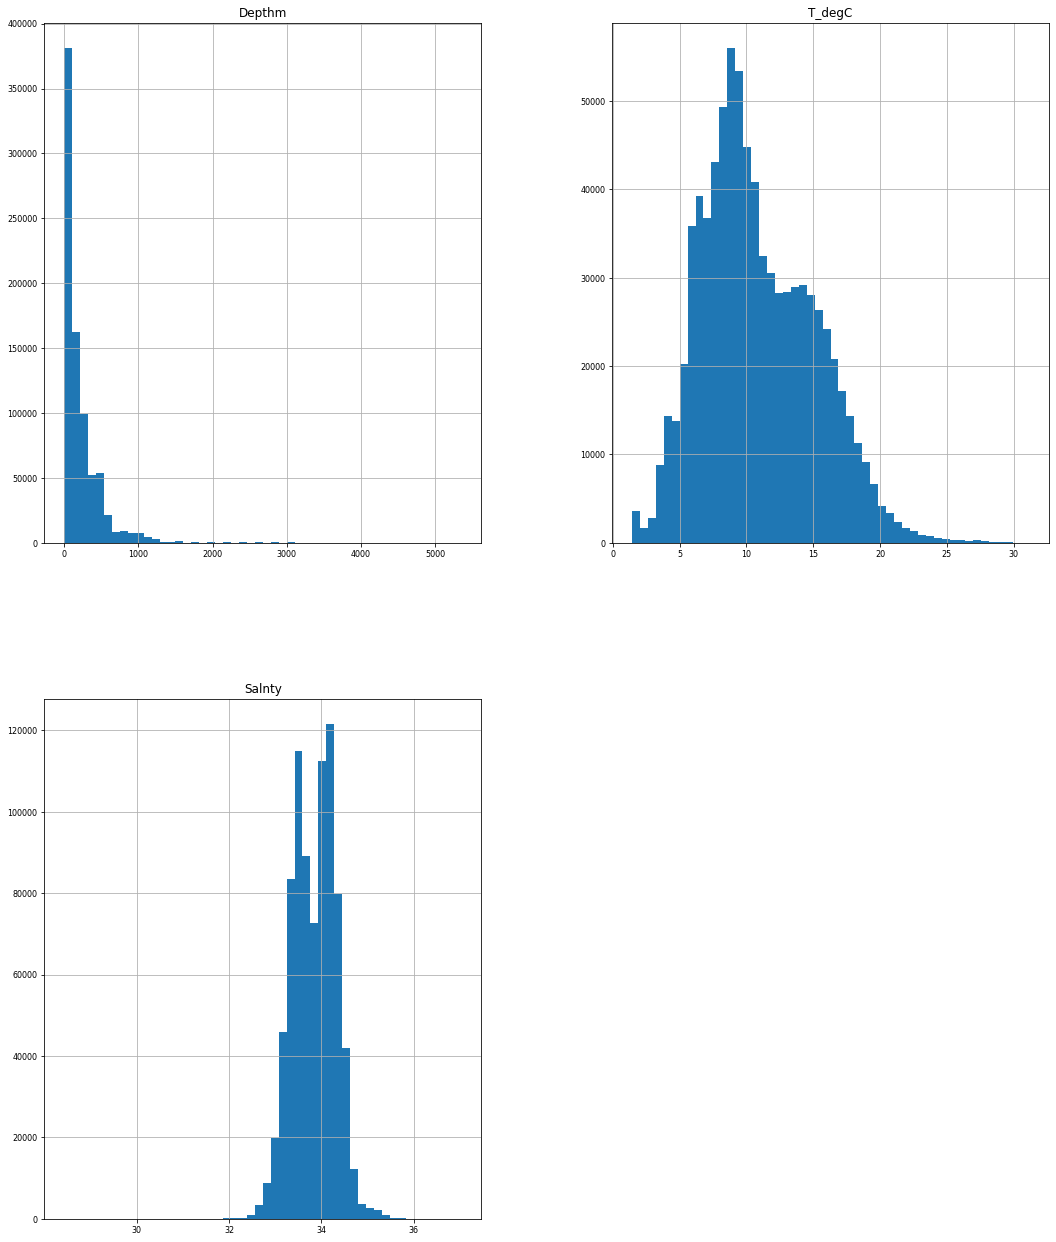

In [11]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [12]:
corr = dataset.corr()

corr

,Depthm,T_degC,Salnty
Depthm,1.000000,-0.675604,0.57263
T_degC,-0.675604,1.000000,-0.50400
Salnty,0.572630,-0.504000,1.00000


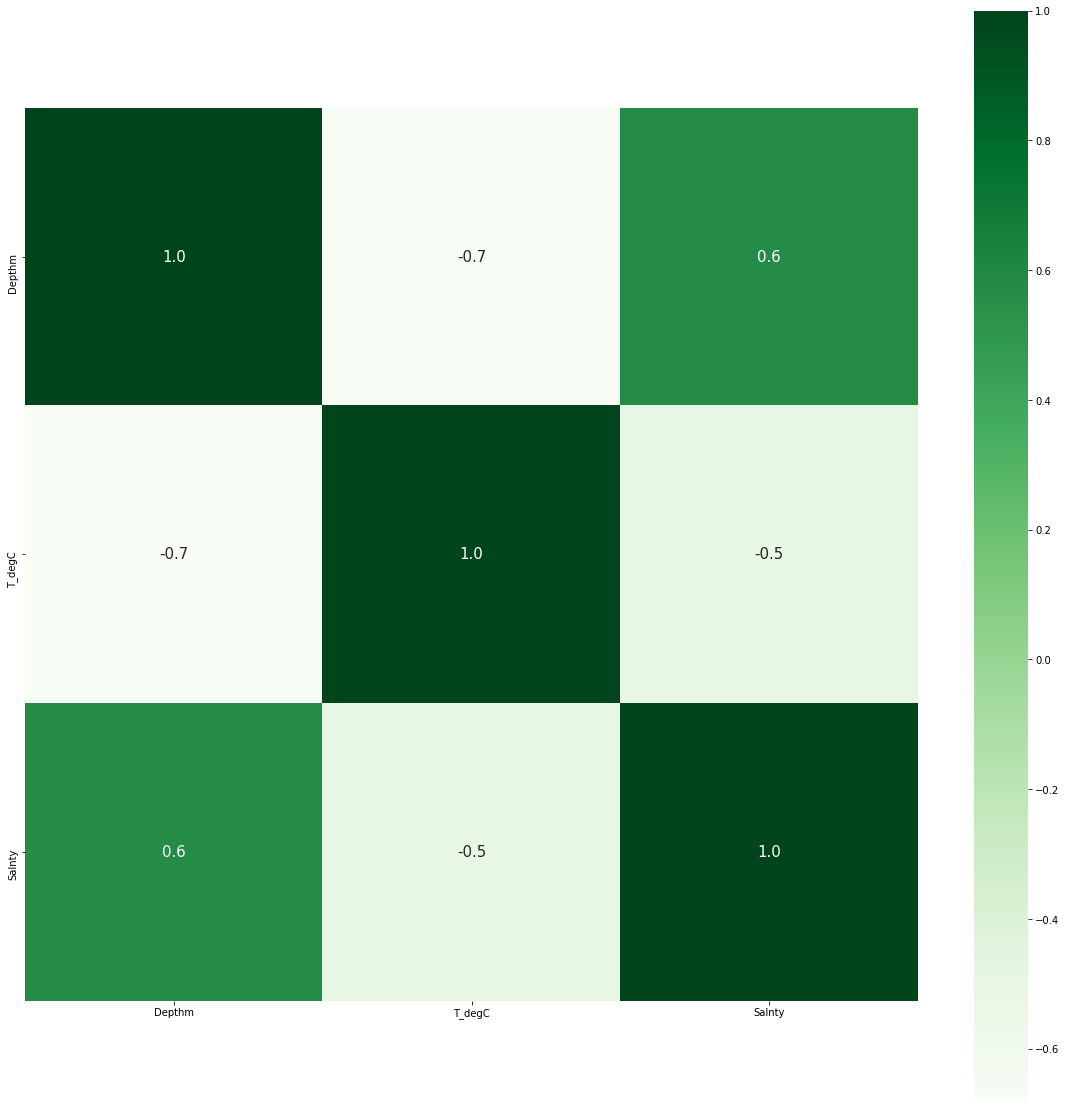

In [13]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Feature Engineering

In [14]:
label = dataset['Salnty']
features = dataset.drop(['Salnty'], axis=1)

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [16]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.6436007810969308
MAE (Mean Absolute Error) 0.5597834805603158
r^2 score 0.3541970327535493
RMSE (Root Mean Squared Error 0.8022473316234406


# Baseline

In [21]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 137s 2ms/step - loss: 0.3616 - val_loss: 0.3339
Epoch 2/50
76642/76642 [==============================] - 137s 2ms/step - loss: 0.3401 - val_loss: 0.3324
Epoch 3/50
76642/76642 [==============================] - 138s 2ms/step - loss: 0.3396 - val_loss: 0.3376
Epoch 4/50
76642/76642 [==============================] - 138s 2ms/step - loss: 0.3338 - val_loss: 0.3130
Epoch 5/50
76642/76642 [==============================] - 138s 2ms/step - loss: 0.3154 - val_loss: 0.3075
Epoch 6/50
76642/76642 [==============================] - 137s 2ms/step - loss: 0.3126 - val_loss: 0.3162
Epoch 7/50
76642/76642 [==============================] - 137s 2ms/step - loss: 0.3119 - val_loss: 0.3074
Epoch 8/50
76642/76642 [==============================] - 137s 2ms/step - loss: 0.3115 - val_loss: 0.3072
Epoch 9/50
76642/76642 [==============================] - 136s 2ms/step - loss: 0.3113 - val_loss: 0.3047
Epoch 10/50
76642/76642 [=====================

In [23]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.2994104362794727
MAE (Mean Absolute Error) 0.3525312800494816
r^2 score 0.6995650815645662
RMSE (Root Mean Squared Error 0.5471840972465051


## Deeper Model

In [20]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 94s 1ms/step - loss: 0.3155 - val_loss: 0.3014
Epoch 2/50
76642/76642 [==============================] - 76s 994us/step - loss: 0.3044 - val_loss: 0.2997
Epoch 3/50
76642/76642 [==============================] - 76s 986us/step - loss: 0.3031 - val_loss: 0.3005
Epoch 4/50
76642/76642 [==============================] - 75s 977us/step - loss: 0.3027 - val_loss: 0.3017
Epoch 5/50
76642/76642 [==============================] - 75s 981us/step - loss: 0.3016 - val_loss: 0.2978
Epoch 6/50
76642/76642 [==============================] - 84s 1ms/step - loss: 0.3007 - val_loss: 0.2968
Epoch 7/50
76642/76642 [==============================] - 83s 1ms/step - loss: 0.2996 - val_loss: 0.2953
Epoch 8/50
76642/76642 [==============================] - 70s 918us/step - loss: 0.2989 - val_loss: 0.2935
Epoch 9/50
76642/76642 [==============================] - 70s 916us/step - loss: 0.2987 - val_loss: 0.2940
Epoch 10/50
76642/76642 [==================

In [21]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.29325511315437164
MAE (Mean Absolute Error) 0.3445997956569064
r^2 score 0.705741466142248
RMSE (Root Mean Squared Error 0.5415303437060306


### Wider model

In [23]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
76642/76642 [==============================] - 56s 731us/step - loss: 0.3366 - val_loss: 0.3140
Epoch 2/100
76642/76642 [==============================] - 56s 729us/step - loss: 0.3157 - val_loss: 0.3103
Epoch 3/100
76642/76642 [==============================] - 56s 731us/step - loss: 0.3120 - val_loss: 0.3068
Epoch 4/100
76642/76642 [==============================] - 54s 709us/step - loss: 0.3103 - val_loss: 0.3038
Epoch 5/100
76642/76642 [==============================] - 53s 692us/step - loss: 0.3091 - val_loss: 0.3124
Epoch 6/100
76642/76642 [==============================] - 54s 707us/step - loss: 0.3072 - val_loss: 0.3017
Epoch 7/100
76642/76642 [==============================] - 53s 689us/step - loss: 0.3028 - val_loss: 0.3003
Epoch 8/100
76642/76642 [==============================] - 58s 753us/step - loss: 0.3020 - val_loss: 0.2979
Epoch 9/100
76642/76642 [==============================] - 70s 914us/step - loss: 0.3018 - val_loss: 0.2982
Epoch 10/100
76642/76642 [==

In [24]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.2951803772442328
MAE (Mean Absolute Error) 0.34866598138957544
r^2 score 0.7038096144439852
RMSE (Root Mean Squared Error 0.5433050498975992


In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [27]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.336584,0.314045,0
1,0.315658,0.310264,1
2,0.311972,0.306816,2
3,0.310348,0.303837,3
4,0.309074,0.312438,4
...,...,...,...
95,0.300193,0.294640,95
96,0.300232,0.302508,96
97,0.300244,0.295079,97
98,0.300229,0.295320,98


In [28]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
95,0.300193,0.294640,95
45,0.300322,0.294785,45
67,0.300244,0.294804,67
58,0.300257,0.294824,58
25,0.300620,0.294835,25
...,...,...,...
71,0.300155,0.305366,71
2,0.311972,0.306816,2
1,0.315658,0.310264,1
4,0.309074,0.312438,4


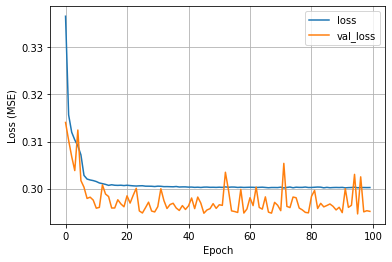

In [29]:
plot_loss(history) # epoch vs loss graph

# Wider Model Tuned

In [30]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
76642/76642 [==============================] - 80s 1ms/step - loss: 0.3509 - val_loss: 0.3316
Epoch 2/100
76642/76642 [==============================] - 77s 1ms/step - loss: 0.3286 - val_loss: 0.3138
Epoch 3/100
76642/76642 [==============================] - 74s 961us/step - loss: 0.3225 - val_loss: 0.3137
Epoch 4/100
76642/76642 [==============================] - 78s 1ms/step - loss: 0.3303 - val_loss: 0.3214
Epoch 5/100
76642/76642 [==============================] - 85s 1ms/step - loss: 0.3235 - val_loss: 0.3170
Epoch 6/100
76642/76642 [==============================] - 71s 923us/step - loss: 0.3244 - val_loss: 0.3139
Epoch 7/100
76642/76642 [==============================] - 75s 978us/step - loss: 0.3266 - val_loss: 0.3076
Epoch 8/100
76642/76642 [==============================] - 70s 907us/step - loss: 0.3369 - val_loss: 0.3303
Epoch 9/100
76642/76642 [==============================] - 68s 882us/step - loss: 0.3259 - val_loss: 0.3088
Epoch 10/100
76642/76642 [==========

In [32]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.31027064050069864
MAE (Mean Absolute Error) 0.3705568236894824
r^2 score 0.6886677173646403
RMSE (Root Mean Squared Error 0.5570194256044385


In [34]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
62,0.316140,0.304700,62
55,0.316347,0.304995,55
70,0.316360,0.305202,70
52,0.316008,0.305338,52
49,0.316206,0.305466,49
...,...,...,...
16,0.340209,0.332980,16
15,0.342597,0.340783,15
40,0.316096,0.341612,40
81,0.315811,0.346990,81


# Wider Model RMSprop

In [35]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
76642/76642 [==============================] - 61s 801us/step - loss: 0.3549 - val_loss: 0.3313
Epoch 2/100
76642/76642 [==============================] - 61s 792us/step - loss: 0.3238 - val_loss: 0.3175
Epoch 3/100
76642/76642 [==============================] - 72s 945us/step - loss: 0.3160 - val_loss: 0.3086
Epoch 4/100
76642/76642 [==============================] - 76s 991us/step - loss: 0.3149 - val_loss: 0.3077
Epoch 5/100
76642/76642 [==============================] - 68s 881us/step - loss: 0.3142 - val_loss: 0.3081
Epoch 6/100
76642/76642 [==============================] - 63s 816us/step - loss: 0.3141 - val_loss: 0.3087
Epoch 7/100
76642/76642 [==============================] - 72s 941us/step - loss: 0.3142 - val_loss: 0.3161
Epoch 8/100
76642/76642 [==============================] - 77s 1ms/step - loss: 0.3143 - val_loss: 0.3076
Epoch 9/100
76642/76642 [==============================] - 69s 904us/step - loss: 0.3145 - val_loss: 0.3085
Epoch 10/100
76642/76642 [====

In [37]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.3152470340034841
MAE (Mean Absolute Error) 0.37546427936101684
r^2 score 0.6836742963112858
RMSE (Root Mean Squared Error 0.5614686402671872


In [39]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
9,0.314812,0.303769,9
83,0.329938,0.304031,83
28,0.322665,0.304220,28
78,0.328934,0.304278,78
60,0.330210,0.305863,60
...,...,...,...
79,0.329156,0.416955,79
90,0.331494,0.450605,90
89,0.331246,0.474680,89
47,0.328504,0.487977,47


# Kesimpulan

Untuk dataset Bottle ini, R2 Score paling tinggi dan MSE terendah didapatkan dengan model Deeper(Baseline), dimana:

MSE (Mean Squared Error) 0.29325511315437164

MAE (Mean Absolute Error) 0.3445997956569064

r^2 score 0.705741466142248

RMSE (Root Mean Squared Error 0.5415303437060306